In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#load breast cancer dataset from sklearn. This dataset is good for dimension reduction as it has many features. 
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [7]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [8]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [10]:
#create dataframe based on dataset
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])

In [16]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [17]:
cancer['target_names']

array(['malignant', 'benign'],
      dtype='<U9')

In [18]:
#normalize the scales of the values as the features are in different domains. 
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
#create a new dataframe with the scaled values
scaled_data = scaler.transform(df)

In [22]:
#Decompose the scaled dataset into just two features

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2)

In [25]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
x_pca = pca.transform(scaled_data)

In [27]:
#compare the shape of the original and decomposed dataset
scaled_data.shape

(569, 30)

In [31]:
x_pca.shape

(569, 2)

array([  1.94858307e+00,  -3.76817174e+00,  -1.07517380e+00,
         1.02755891e+01,  -1.94807157e+00,   3.94992890e+00,
        -2.69003128e+00,   2.34024401e+00,   3.39181295e+00,
         7.72717407e+00,  -2.65927550e+00,   6.65679266e-02,
         2.70097649e+00,  -9.68279261e-01,   4.86108331e+00,
         2.97706118e+00,  -1.56475773e+00,   1.41867033e+00,
        -4.11433352e+00,  -1.88214954e-01,   5.72808193e-01,
         1.66294990e+00,   3.30496373e+00,  -5.12836651e+00,
        -1.54375229e+00,   2.01861034e+00,   2.17162512e+00,
        -1.87655235e+00,   5.37242161e-01,  -1.52370502e+00,
        -7.57177451e-01,   4.00529551e+00,   3.37536154e-01,
        -1.13258891e+00,   7.58423243e-01,  -3.54355942e-01,
         9.13196276e-01,  -1.41347312e+00,  -3.35129292e+00,
         8.86243953e-01,  -1.92399162e+00,   2.26075201e+00,
         2.01867310e+00,   9.84930020e-01,  -1.37099091e-01,
        -1.34876978e-01,   1.48422032e+00,   2.35227179e+00,
         9.58296095e-02,

Text(0,0.5,'Second Principal Component')

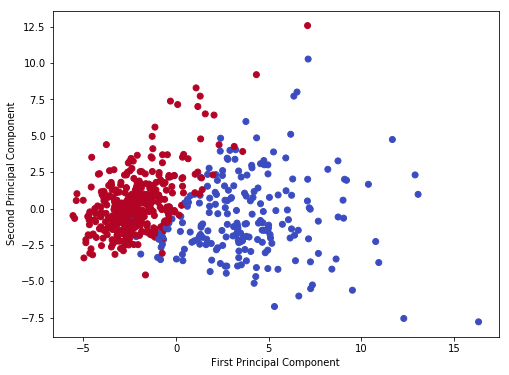

In [40]:
#plot the decomposed dataset. Divide them between the prediction target. 
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=cancer['target'], cmap='coolwarm')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [41]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [43]:
#investigate the components 
df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])

In [44]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


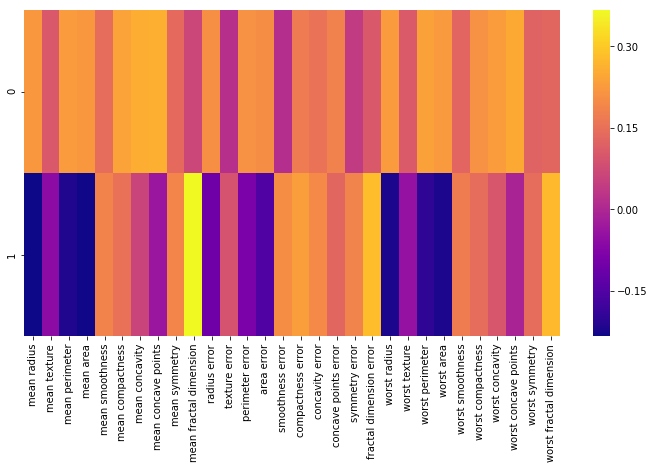

In [48]:
#visualize how much of each feature is relevant in each component. 
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')